In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = 'https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2022.zip'
#full_df = pd.read_csv('survey_results_public.csv')
full_df = pd.read_csv(url.open('survey_results_public.csv'))
df = full_df.copy()
df.head()

AttributeError: 'str' object has no attribute 'open'

In [3]:
df = df[['Country', 'EdLevel', 'YearsCodePro', 'Employment', 'ConvertedCompYearly']]
df.rename(columns={'ConvertedCompYearly': 'Salary'}, inplace=True)
print(len(df))
df.head()

73268


,Country,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,Canada,NaN,NaN,"Employed, full-time",NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
4,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,"Employed, full-time",NaN


In [4]:
df = df.loc[df.Salary.notnull()]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38071 entries, 2 to 73121
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       38071 non-null  object 
 1   EdLevel       38054 non-null  object 
 2   YearsCodePro  37935 non-null  object 
 3   Employment    38067 non-null  object 
 4   Salary        38071 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.7+ MB


In [6]:
df = df.dropna()

In [7]:
df.Employment.unique()

array(['Employed, full-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Independent contractor, freelancer, or self-employed',
       'Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Employed, part-time', 'I prefer not to say',
       'Independent contractor, freelancer, or self-employed;Retired',
       'Retired', 'Employed, part-time;Retired',
       'Employed, full-time;Retired',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Retired'],
      dtype=object)

In [8]:
df = df.loc[df.Employment.str.contains('Employed, full-time')]
df.drop(columns=['Employment'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34288 entries, 2 to 73121
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34288 non-null  object 
 1   EdLevel       34288 non-null  object 
 2   YearsCodePro  34288 non-null  object 
 3   Salary        34288 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.3+ MB


In [9]:
def shorten_categories(cat, cutoff):
    cat_map = {}
    for i in range(len(cat)):
        if cat.values[i] >= cutoff:
            cat_map[cat.index[i]] = cat.index[i]
        else:
            cat_map[cat.index[i]] = 'Other'
    return cat_map

In [10]:
country_map = shorten_categories(df.Country.value_counts(), 300)
df.Country = df.Country.map(country_map)
df.Country.value_counts()

United States of America                                8292
Other                                                   7834
Germany                                                 2540
United Kingdom of Great Britain and Northern Ireland    2435
India                                                   2049
Canada                                                  1363
France                                                  1202
Brazil                                                  1161
Spain                                                    921
Netherlands                                              749
Poland                                                   748
Australia                                                740
Italy                                                    710
Sweden                                                   597
Russian Federation                                       486
Switzerland                                              438
Turkey                  

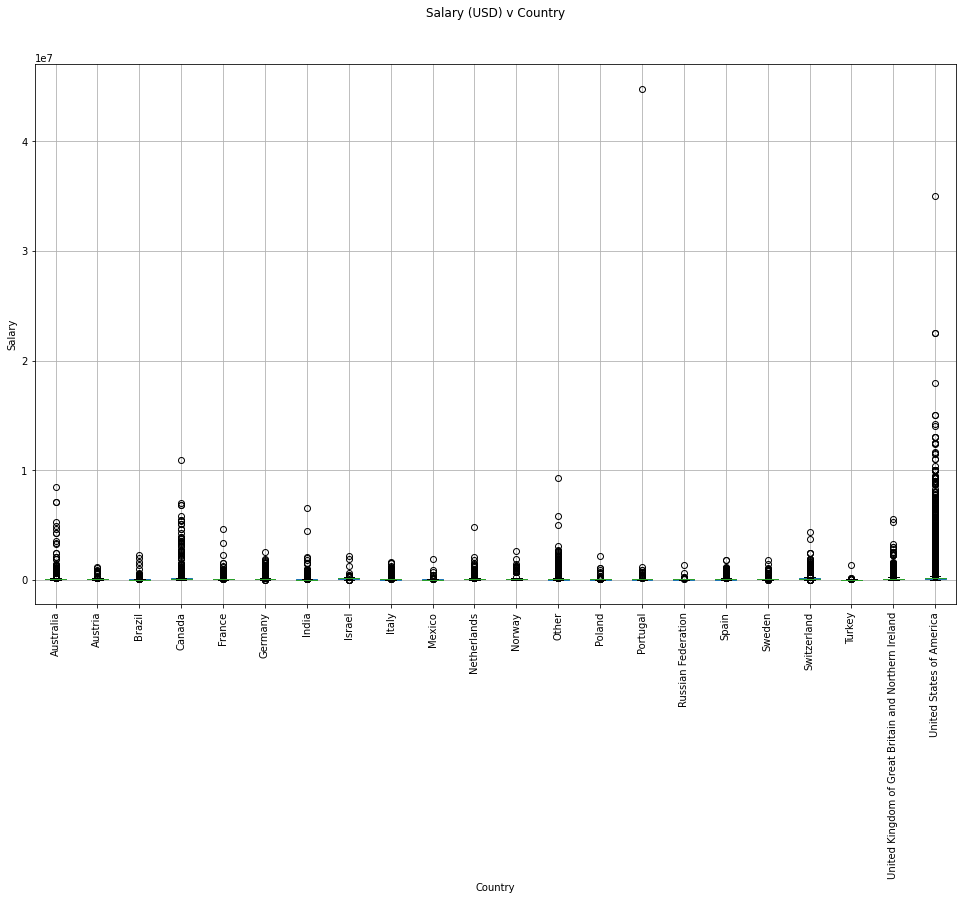

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (USD) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [12]:
df = df.loc[(df.Salary <= 250000)&(df.Salary >= 10000)&(df.Country!='Other')]

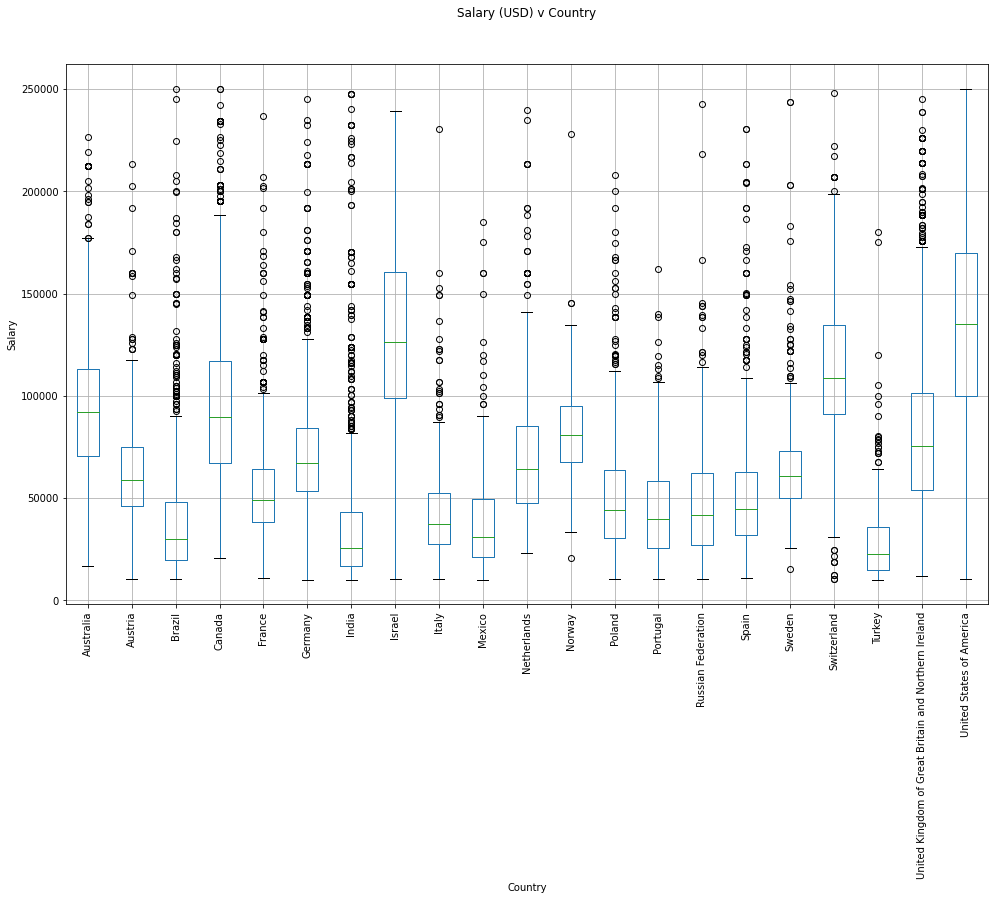

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (USD) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [14]:
df.loc[df.YearsCodePro=='Less than 1 year', 'YearsCodePro'] = 0.5
df.loc[df.YearsCodePro=='More than 50 years', 'YearsCodePro'] = 50

In [15]:
df.EdLevel.unique()[0]

'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'

In [16]:
def clean_edu(x):
    if "Bachelor’s" in x:
        return "Bachelor's degree"
    if "Master’s" in x:
        return "Master's degree"
    if "Professional" in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

In [17]:
df.EdLevel = df.EdLevel.apply(clean_edu)

In [18]:
df.EdLevel.unique()

array(["Master's degree", "Bachelor's degree", 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [19]:
from sklearn.preprocessing import LabelEncoder
le_edu = LabelEncoder()
df.EdLevel = le_edu.fit_transform(df.EdLevel)
df.EdLevel.unique()

array([2, 0, 1, 3])

In [20]:
le_country = LabelEncoder()
df.Country = le_country.fit_transform(df.Country)
df.Country.unique()

array([19,  7, 10, 20,  1,  8,  3,  5, 12, 11,  4,  2, 16, 15, 18,  6,  9,
       17,  0, 13, 14])

In [21]:
X = df.drop(columns='Salary')
y = df['Salary']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = regressor.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [28]:
error = np.sqrt(mean_squared_error(y_test, y_pred))
error

46617.51006149081

In [29]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [30]:
y_pred = tree_reg.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))

In [31]:
error

38263.2020143825

In [32]:
from sklearn.ensemble import RandomForestRegressor
random_reg = RandomForestRegressor(random_state=0)
random_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [33]:
y_pred = random_reg.predict(X_test)

In [34]:
error = np.sqrt(mean_squared_error(y_test, y_pred))
error

37593.53363507713

In [44]:
from sklearn.model_selection import GridSearchCV
max_depth = [2, 4, 6, 8, 10, 12]
parameters = {'max_depth': max_depth}

gs = GridSearchCV(random_reg, parameters, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(max_depth=10, random_state=0),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [45]:
random_reg = gs.best_estimator_
y_pred = random_reg.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
error

36718.46849216871

In [46]:
new_X = np.array([['United States of America', "Master's degree", 15]])
new_X

array([['United States of America', "Master's degree", '15']],
      dtype='<U24')

In [47]:
new_X[:, 0] = le_country.transform(new_X[:, 0])
new_X[:, 1] = le_edu.transform(new_X[:, 1])
new_X = new_X.astype(float)
new_X

array([[20.,  2., 15.]])

In [49]:
first_pred = random_reg.predict(new_X)
first_pred

array([168786.81094665])

In [50]:
import pickle

In [51]:
data = {'model': random_reg, 'le_country': le_country, 'le_edu': le_edu}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [52]:
with open('saved_steps.pkl', 'rb') as file:
   data = pickle.load(file)

random_reg = data['model']
le_country = data['le_country']
le_edu = data['le_edu']

In [53]:
second_pred = random_reg.predict(new_X)
second_pred

array([168786.81094665])

In [61]:
classes = pd.DataFrame(le_edu.classes_)

In [62]:
list(classes[0].unique())

["Bachelor's degree", 'Less than a Bachelors', "Master's degree", 'Post grad']